# 1. Project Title:

## Exploratory Data Analysis of Movie and TV Show Data

# 2. Project Description/Objective:
* This project aims to perform a comprehensive exploratory data analysis on a dataset containing information about movies and TV shows. The objective is to understand the data's structure, identify key trends, and extract valuable insights regarding content production, ratings, and personnel.

# 3. Dataset Information:
* The analysis utilizes two datasets: 'credits.csv' and 'titles.csv', which contain information about cast and crew, as well as movie/show details such as release year, genres, and ratings. These datasets were merged on the 'id' column to create a unified dataset for analysis.

# 4. Tools and Libraries Used:

* The analysis was conducted using Python with the following libraries: pandas, numpy, matplotlib, seaborn, and wordcloud.

# 5. Author/Contributor Information:


Conducted by: K Naga Vardhan Reddy, AI/ML Engineer Intern, Labmentix.

# GitHub Link:
https://github.com/kulurunagavardhanreddy/Labmentix-Internship-Amazon-Prime-EDA

# Import Necessary Libraries
* numpy (np): Used for numerical computations and array manipulation, essential for data processing.
* pandas (pd): Provides data structures (like DataFrames) and data analysis tools for efficient data manipulation and exploration.
* matplotlib.pyplot (plt): A plotting library for creating static, interactive, and animated visualizations in Python.
* seaborn (sns): Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
* wordcloud: Used to generate word cloud visualizations from text data, providing insights into the most frequent words.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

* warnings: Used to handle warning messages, allowing us to suppress them for cleaner output.

In [81]:
import warnings
warnings.filterwarnings('ignore')

* The code defines the file paths for the "credits" and "titles" CSV files.
* The load_data() function reads these CSV files into pandas DataFrames and performs an inner merge on the "id" column to combine the data into a single DataFrame (df). This is a crucial step for integrating related datasets.

In [82]:
# Load datasets
credits_path = r"C:\Users\nag15\Downloads\credits.csv"
titles_path = r"C:\Users\nag15\Downloads\titles.csv"

In [83]:
def load_data(credits_path, titles_path):
    df1 = pd.read_csv(credits_path)
    df2 = pd.read_csv(titles_path)
    df = pd.merge(df1, df2, on='id', how='inner')
    return df

In [84]:
df = load_data(credits_path, titles_path)

## Initial Data Exploration

In [85]:
# Display basic information
def basic_info(df):
    print("Dataset Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


* The basic_info() function provides a summary of the DataFrame, including data types, non-null counts, missing values, and basic statistics.
* The code then performs additional checks using df.head(), df.info(), df.columns, and df.isnull().sum() to gain a deeper understanding of the data's structure and quality.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

In [87]:
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [88]:
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                16307
role                         0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
dtype: int64

* The missing percentage is calculated to identify the severity of missing data in each column.

In [89]:
# Check missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

person_id                0.000000
id                       0.000000
name                     0.000000
character               13.114108
role                     0.000000
title                    0.000000
type                     0.000000
description              0.073182
release_year             0.000000
age_certification       54.396166
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 93.443348
imdb_id                  4.264679
imdb_score               4.866221
imdb_votes               4.885522
tmdb_popularity          0.012063
tmdb_score               8.255125
dtype: float64

In [90]:
# Handle missing values
def handle_missing_values(df):
    df.fillna({
        'character': 'Unknown',
        'description': 'No Description',
        'age_certification': 'Not Rated',
        'imdb_id': 'No IMDb ID',
        'imdb_score': df['imdb_score'].median(),
        'imdb_votes': df['imdb_votes'].median(),
        'tmdb_popularity': df['tmdb_popularity'].median(),
        'tmdb_score': df['tmdb_score'].median()
    }, inplace=True)
    return df

df = handle_missing_values(df)

* The handle_missing_values() function fills missing values in the DataFrame using appropriate strategies.
* Categorical columns are filled with "Unknown," "No Description," or "Not Rated."
* Numerical columns are filled with their respective medians, which is a robust approach to handling outliers.

## Data Transformation:

In [91]:
# Convert genre and country columns into lists
df['genres'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['production_countries'] = df['production_countries'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

* These lines transform the "genres" and "production_countries" columns, which contain comma-separated strings, into lists of strings. This is essential for performing analysis on individual genres and countries.

## Exploratory Data Analysis (EDA):

* The code then proceeds with a comprehensive EDA, divided into logical sections:

# -------------------- 1. Data Overview and Cleaning --------------------

* plot_missing_values(): Visualizes missing values using a heatmap.

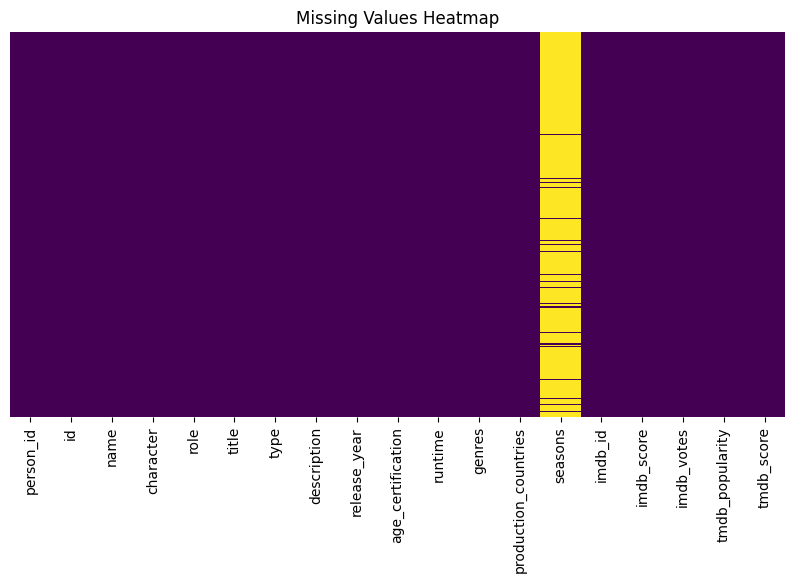

In [92]:
# 1.1 Missing Values Analysis
def plot_missing_values(df):
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.show()

plot_missing_values(df)

# -------------------- 2. Basic Content Analysis --------------------

* type_analysis(): Analyzes the distribution of movie vs. show types.

* plot_release_years(), plot_release_years_grouped(): Examine the distribution of release years


Type Count:
type
MOVIE    116194
SHOW       8153
Name: count, dtype: int64


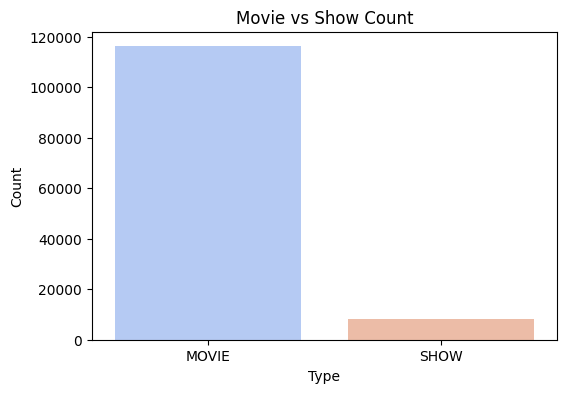

In [93]:
# 2.1 Type Analysis (Movie vs Show)
def type_analysis(df):
    type_counts = df['type'].value_counts()
    print("\nType Count:")
    print(type_counts)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')
    plt.title("Movie vs Show Count")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.show()
type_analysis(df)

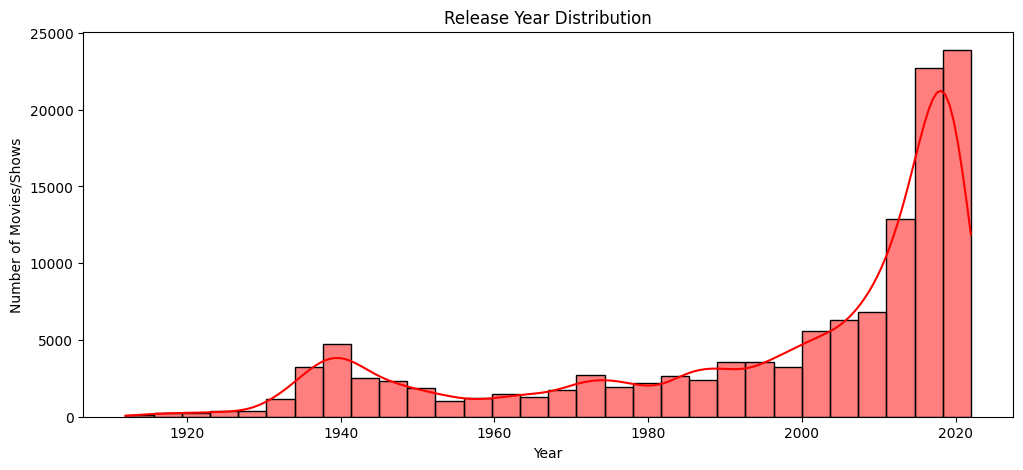

In [94]:
# 2.2 Release Year Analysis
def plot_release_years(df):
    plt.figure(figsize=(12, 5))
    sns.histplot(df['release_year'], bins=30, kde=True, color='red')
    plt.title("Release Year Distribution")
    plt.xlabel("Year")
    plt.ylabel("Number of Movies/Shows")
    plt.show()
plot_release_years(df)

* plot_release_years(), plot_release_years_grouped(): Examine the distribution of release years.

Number of Movies/Shows per 5-Year Interval:
release_year_grouped
1910       44
1915      303
1920      353
1925      481
1930     1872
1935     5074
1940     4861
1945     2903
1950     2178
1955     1389
1960     1824
1965     2078
1970     3349
1975     2973
1980     2795
1985     4582
1990     3716
1995     5479
2000     7275
2005     9079
2010    15155
2015    31162
2020    15422
Name: count, dtype: int64


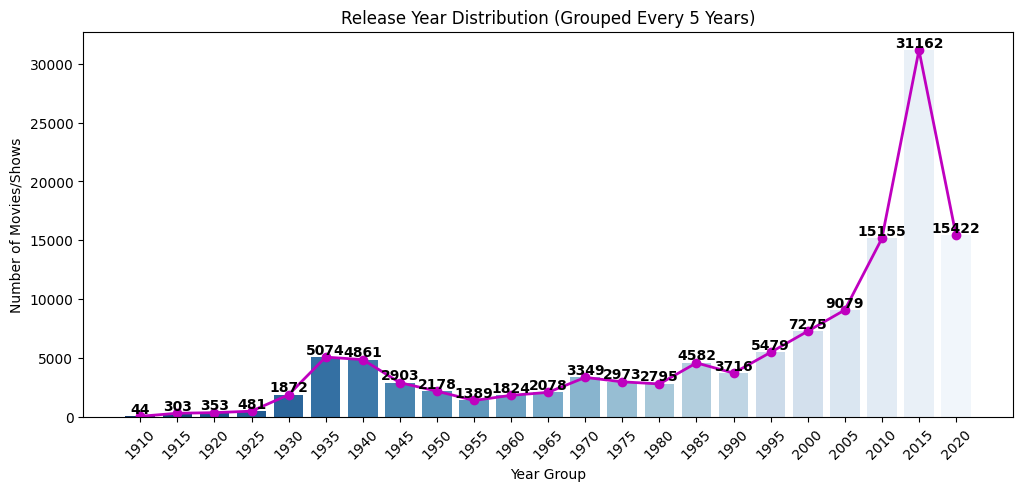

In [95]:
# 2.3  plot_release_years_grouped Analysis
def plot_release_years_grouped(df):
    df['release_year_grouped'] = (df['release_year'] // 5) * 5
    release_counts = df['release_year_grouped'].value_counts().sort_index()
    print("Number of Movies/Shows per 5-Year Interval:")
    print(release_counts)
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x=release_counts.index.astype(str), y=release_counts.values, palette='Blues_r')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.plot(release_counts.index.astype(str), release_counts.values, color='m', marker='o', linewidth=2, linestyle='-')
    plt.xticks(rotation=45)
    plt.title("Release Year Distribution (Grouped Every 5 Years)")
    plt.xlabel("Year Group")
    plt.ylabel("Number of Movies/Shows")
    plt.show()


plot_release_years_grouped(df)

* plot_genre_distribution(), genres_trend_over_years(): Analyze genre distributions and trends.


Unique Genres Count:
['drama'       26956
 'drama']      16703
 'drama'       16265
['thriller'    15177
 'action'      13558
               ...  
['sport'          68
['european'       27
['history']       12
['war']            6
['sport']          4
Name: count, Length: 76, dtype: int64


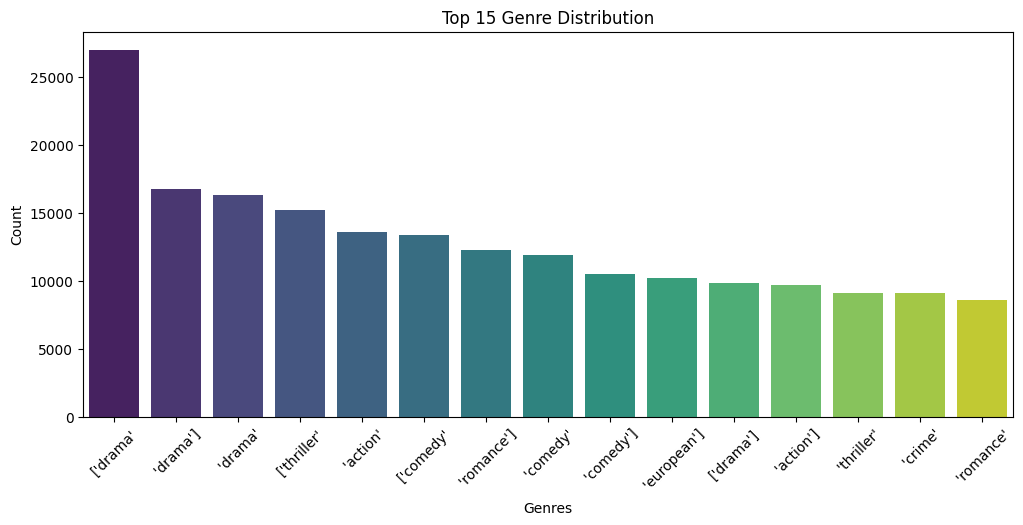

In [96]:
# 2.3 Genre Analysis
def plot_genre_distribution(df):
    genre_counts = pd.Series([genre for sublist in df['genres'] for genre in sublist]).value_counts()
    print("\nUnique Genres Count:")
    print(genre_counts)
    plt.figure(figsize=(12, 5))
    sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15], palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Top 15 Genre Distribution")
    plt.xlabel("Genres")
    plt.ylabel("Count")
    plt.show()

plot_genre_distribution(df)

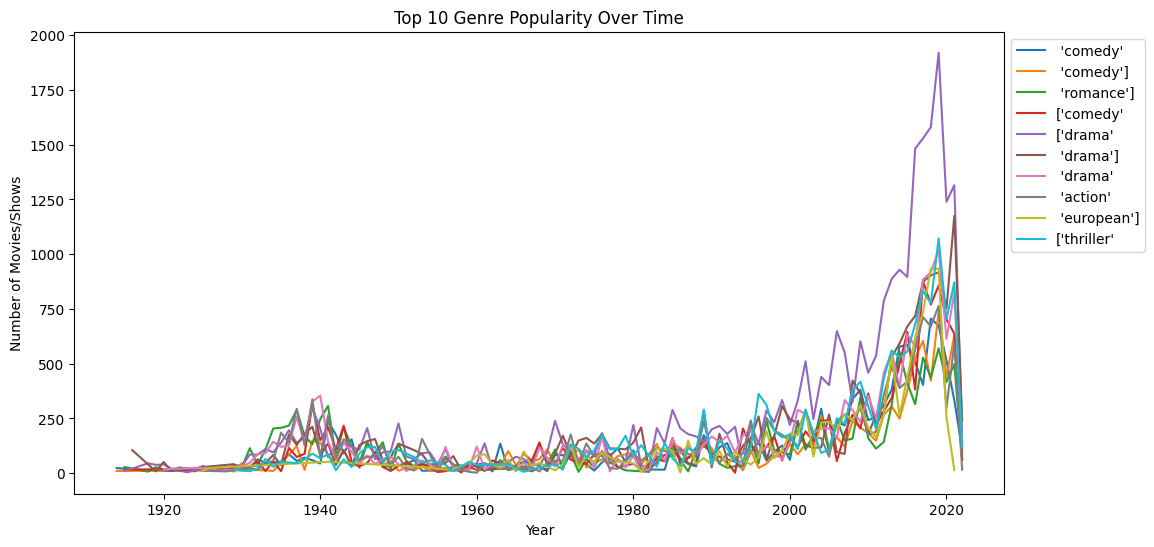

In [97]:
def genres_trend_over_years(df):
    df_exploded = df.explode('genres')
    top_genres = df_exploded['genres'].value_counts().index[:10]
    df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered.groupby(['release_year', 'genres']).size().reset_index(name='count'),
                 x='release_year', y='count', hue='genres', ci=None)
    plt.title("Top 10 Genre Popularity Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Movies/Shows")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

genres_trend_over_years(df)

* country_distribution(), country_genre_combinations(): Explore country distributions and genre combinations.

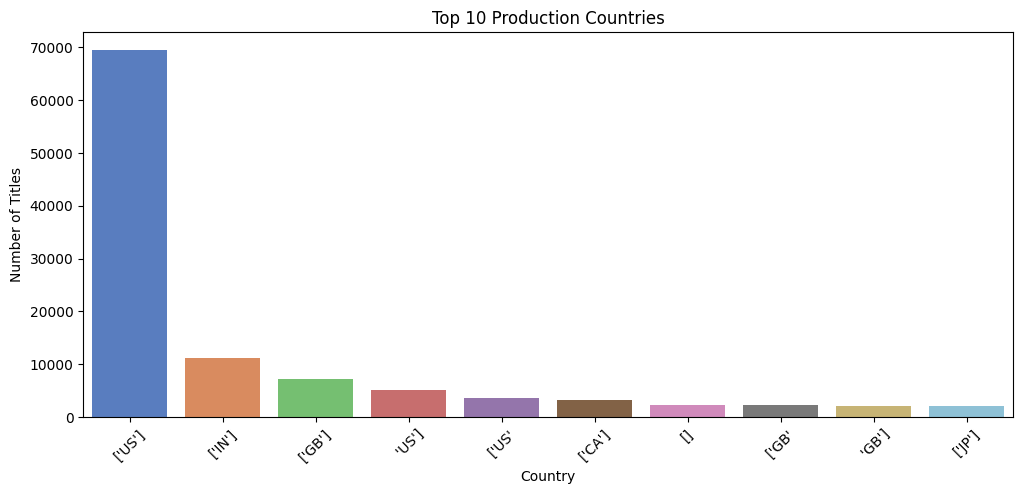

In [98]:
# 2.4 Country Analysis
def country_distribution(df):
    country_counts = pd.Series([country for sublist in df['production_countries'] for country in sublist]).value_counts().head(10)
    plt.figure(figsize=(12, 5))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted')
    plt.xticks(rotation=45)
    plt.title("Top 10 Production Countries")
    plt.xlabel("Country")
    plt.ylabel("Number of Titles")
    plt.show()

country_distribution(df)


Top 10 Country-Genre Combinations:
production_countries  genres     
['US']                ['drama'       12935
                       'drama']       9589
                       'drama'        8520
                      ['thriller'     7990
                       'romance']     7861
                      ['comedy'       7849
                       'action'       6973
                       'comedy']      6746
                       'comedy'       6535
                       'action']      5449
dtype: int64


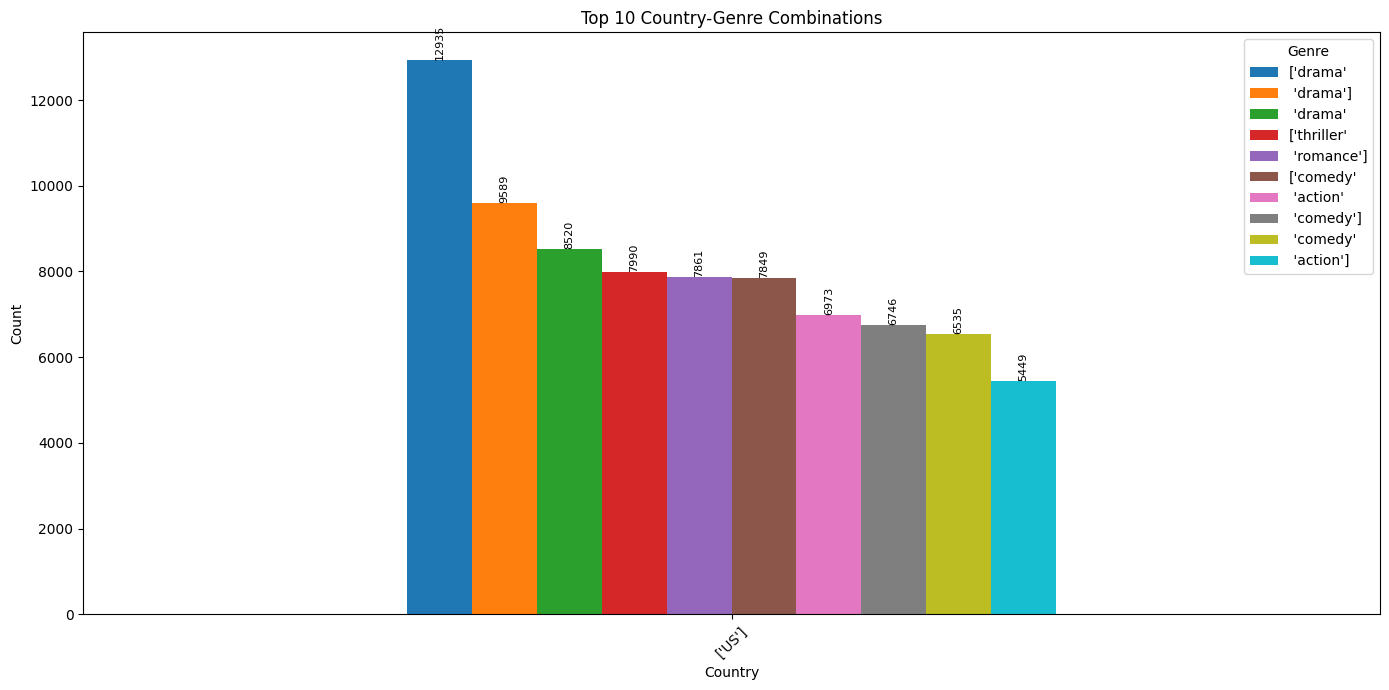

In [99]:
def country_genre_combinations(df):
    df_exploded = df.explode('genres').explode('production_countries')
    country_genre_counts = df_exploded.groupby(['production_countries', 'genres']).size().nlargest(10)
    print("\nTop 10 Country-Genre Combinations:")
    print(country_genre_counts)
    country_genre_counts_unstacked = country_genre_counts.unstack()
    ax = country_genre_counts_unstacked.plot(kind='bar', figsize=(14, 7))
    plt.title("Top 10 Country-Genre Combinations")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Genre", bbox_to_anchor=(1, 1))
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8, rotation=90)
    plt.tight_layout()
    plt.show()

country_genre_combinations(df)

* runtime_distribution(): Visualizes the runtime distribution.

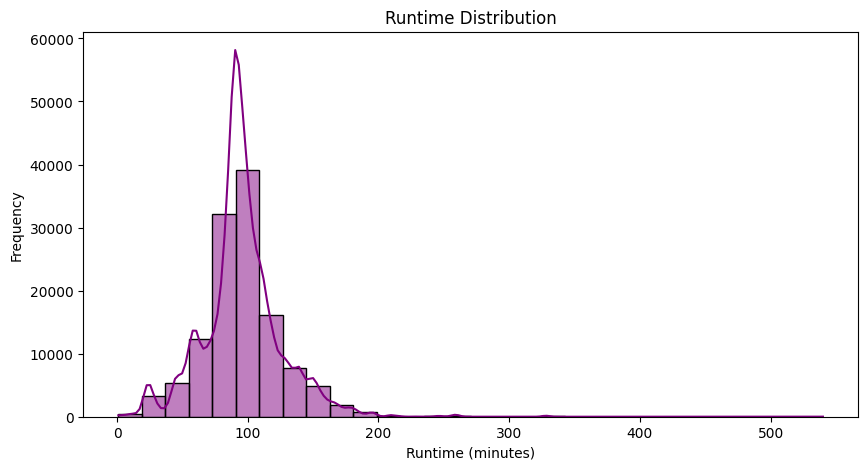

In [100]:
# 2.5 Runtime Analysis
def runtime_distribution(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['runtime'], bins=30, kde=True, color='purple')
    plt.title("Runtime Distribution")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("Frequency")
    plt.show()

runtime_distribution(df)

# -------------------- 3. Score and Rating Analysis --------------------

* plot_imdb_scores(), plot_tmdb_scores(): Visualize IMDb and TMDB score distributions.

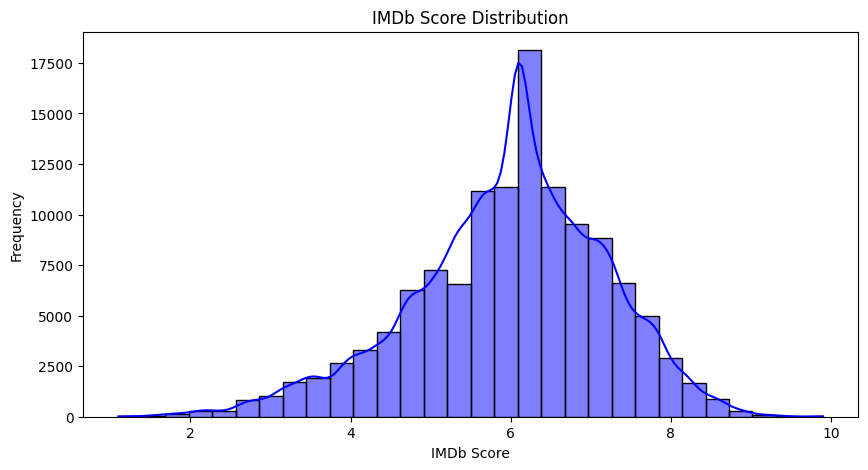

In [101]:
# 3.1 Score Analysis (IMDb & TMDB)
def plot_imdb_scores(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['imdb_score'], bins=30, kde=True, color='blue')
    plt.title("IMDb Score Distribution")
    plt.xlabel("IMDb Score")
    plt.ylabel("Frequency")
    plt.show()

plot_imdb_scores(df)

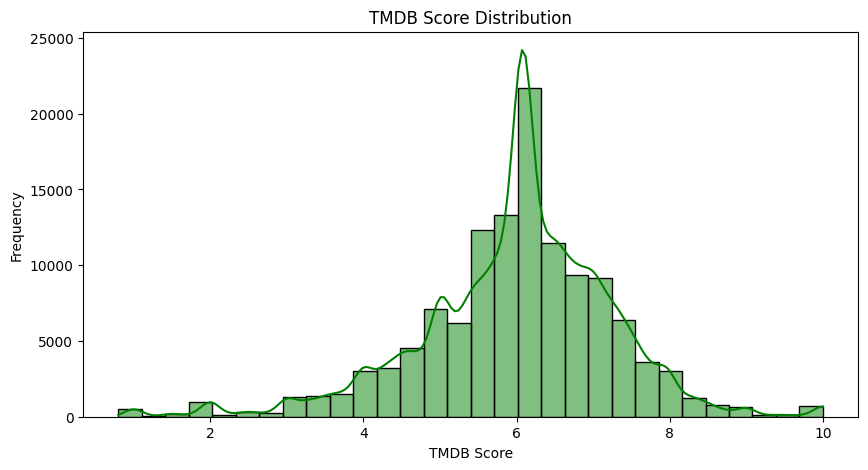

In [102]:
def plot_tmdb_scores(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['tmdb_score'], bins=30, kde=True, color='green')
    plt.title("TMDB Score Distribution")
    plt.xlabel("TMDB Score")
    plt.ylabel("Frequency")
    plt.show()

plot_tmdb_scores(df)

* imdb_vs_tmdb(), correlation_matrix(): Analyze score correlations.

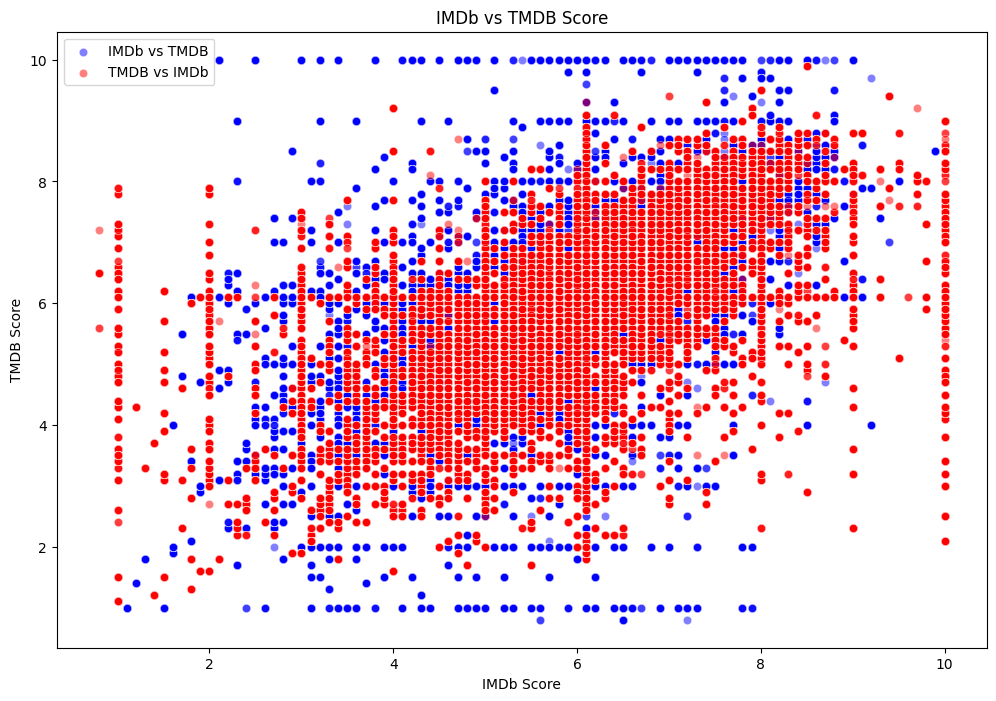

In [103]:
# 3.2 Score Correlation
def imdb_vs_tmdb(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=df['imdb_score'], y=df['tmdb_score'], alpha=0.5, color='blue', label='IMDb vs TMDB')
    sns.scatterplot(x=df['tmdb_score'], y=df['imdb_score'], alpha=0.5, color='red', label='TMDB vs IMDb')
    plt.title("IMDb vs TMDB Score")
    plt.xlabel("IMDb Score")
    plt.ylabel("TMDB Score")
    plt.legend()
    plt.show()

imdb_vs_tmdb(df)

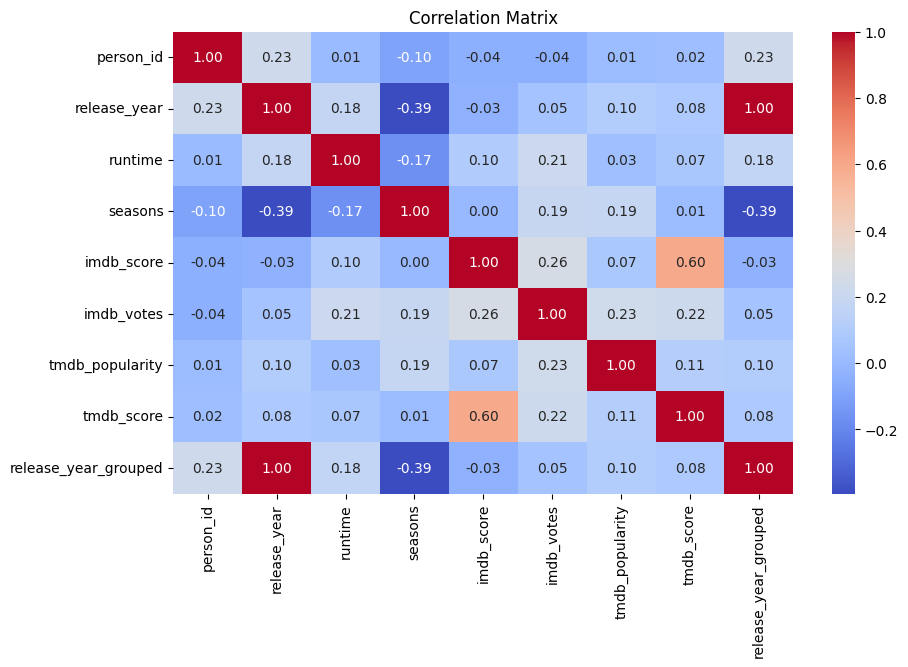

In [104]:
def correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

correlation_matrix(df)

* age_certification_analysis(), season_analysis(): Examine age certification and season distributions.


Age Certification Distribution:
age_certification
Not Rated    67640
R            25931
PG-13        12492
PG            9617
G             3839
TV-MA         1732
TV-14         1583
TV-PG          501
TV-Y7          356
TV-Y           298
TV-G           242
NC-17          116
Name: count, dtype: int64


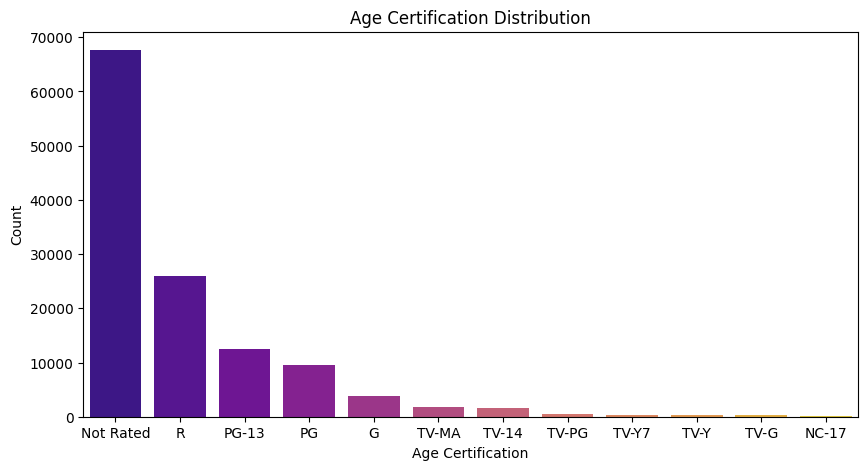

In [105]:
# 3.3 Age Certification Analysis
def age_certification_analysis(df):
    age_counts = df['age_certification'].value_counts()
    print("\nAge Certification Distribution:")
    print(age_counts)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_counts.index, y=age_counts.values, palette='plasma')
    plt.title("Age Certification Distribution")
    plt.xlabel("Age Certification")
    plt.ylabel("Count")
    plt.show()

age_certification_analysis(df)


Season Distribution for Shows:
seasons
1.0     4896
2.0     1249
3.0      708
4.0      353
5.0      244
6.0      251
7.0       95
8.0       79
9.0       59
10.0      42
11.0      23
12.0      38
13.0      20
14.0      16
15.0      11
16.0      10
17.0       3
18.0       1
19.0       1
21.0       9
22.0       7
24.0       9
25.0       2
26.0       3
28.0       1
31.0       1
34.0       1
35.0      18
42.0       1
49.0       2
Name: count, dtype: int64


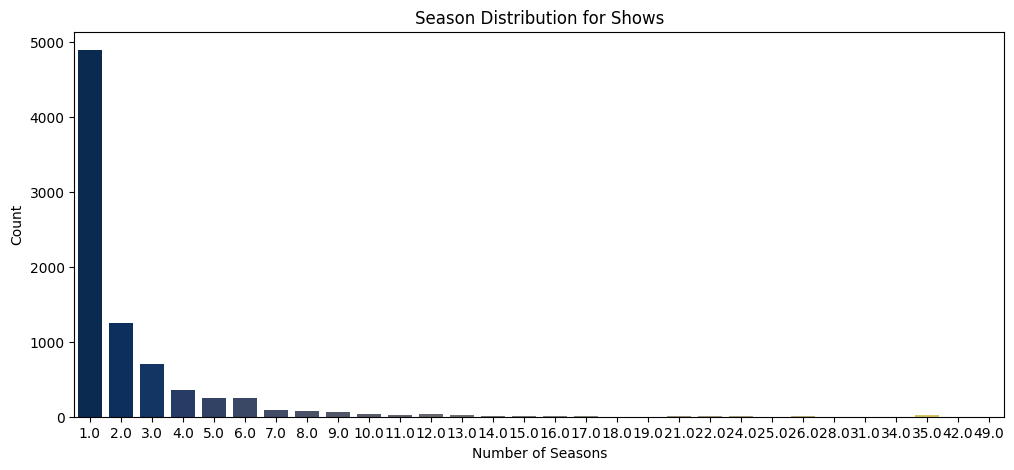

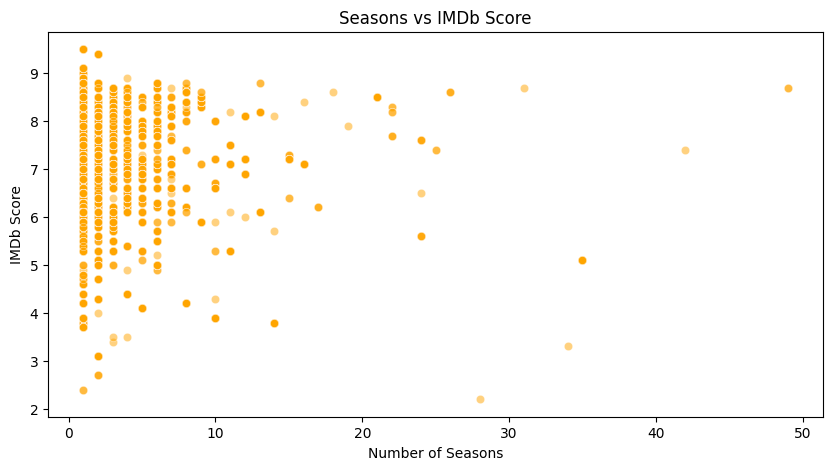

In [106]:
# 3.4 Season Analysis (for Shows)
def season_analysis(df):
    shows = df[df['type'] == 'SHOW']
    if not shows.empty:
        season_counts = shows['seasons'].value_counts().sort_index()
        print("\nSeason Distribution for Shows:")
        print(season_counts)
        plt.figure(figsize=(12, 5))
        sns.barplot(x=season_counts.index, y=season_counts.values, palette='cividis')
        plt.title("Season Distribution for Shows")
        plt.xlabel("Number of Seasons")
        plt.ylabel("Count")
        plt.show()
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x='seasons', y='imdb_score', data=shows, alpha=0.5, color='orange')
        plt.title("Seasons vs IMDb Score")
        plt.xlabel("Number of Seasons")
        plt.ylabel("IMDb Score")
        plt.show()

season_analysis(df)

# -------------------- 4. Personnel Analysis --------------------

* actor_director_analysis(), character_analysis(): Analyze actor, director, and character distributions.


Top 10 Actors:
name
George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Gene Autry              40
Charles King            38
Nassar                  37
Herman Hack             35
Earl Dwire              34
George Morrell          34
Forrest Taylor          34
Name: count, dtype: int64

Top 10 Directors:
name
Joseph Kane           41
Sam Newfield          38
Jay Chapman           34
Lesley Selander       22
John English          21
Harry L. Fraser       21
William Nigh          20
Robert N. Bradbury    17
Manny Rodriguez       17
Brian Volk-Weiss      16
Name: count, dtype: int64


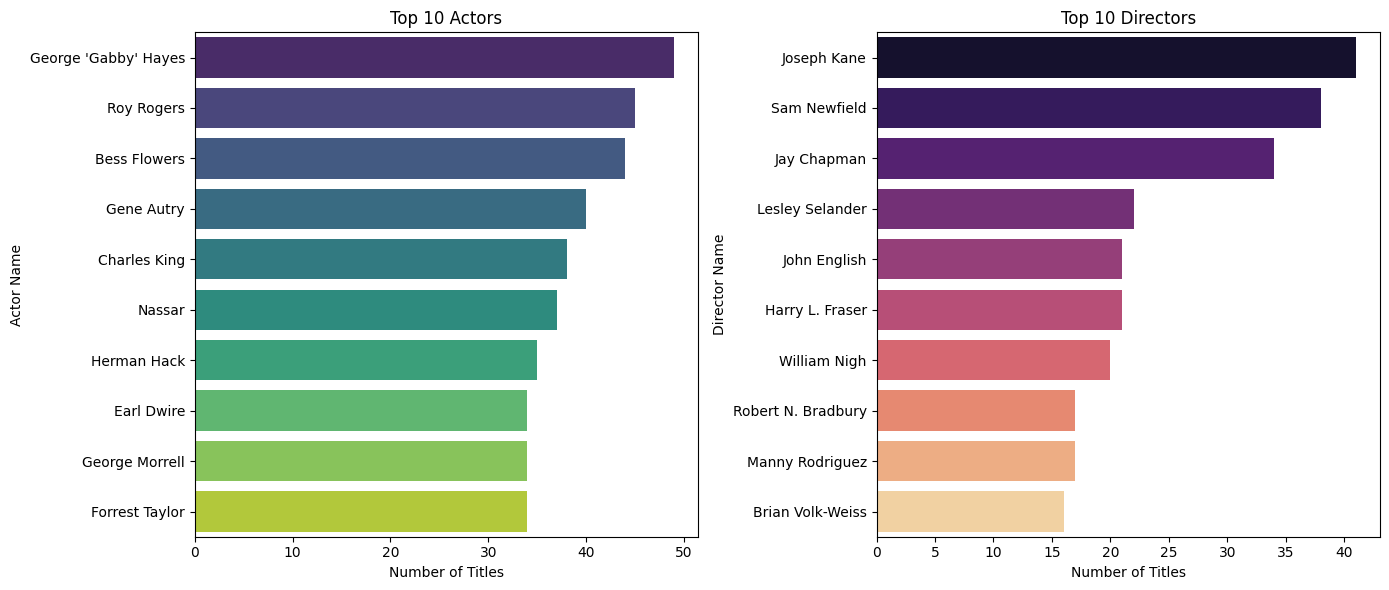

In [107]:
# 4.1 Actor/Director Analysis
def actor_director_analysis(df):
    actors = df[df['role'] == 'ACTOR']['name'].value_counts().head(10)
    directors = df[df['role'] == 'DIRECTOR']['name'].value_counts().head(10)
    print("\nTop 10 Actors:")
    print(actors)
    print("\nTop 10 Directors:")
    print(directors)
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=actors.values, y=actors.index, palette='viridis')
    plt.title("Top 10 Actors")
    plt.xlabel("Number of Titles")
    plt.ylabel("Actor Name")
    plt.subplot(1, 2, 2)
    sns.barplot(x=directors.values, y=directors.index, palette='magma')
    plt.title("Top 10 Directors")
    plt.xlabel("Number of Titles")
    plt.ylabel("Director Name")
    plt.tight_layout()
    plt.show()

actor_director_analysis(df)


Top 10 Characters:
character
Unknown                   16307
Himself                    1540
Self                       1245
Herself                     418
Henchman                    252
Dancer                      221
Doctor                      173
Self (archive footage)      146
Bartender                   142
Nurse                       132
Name: count, dtype: int64


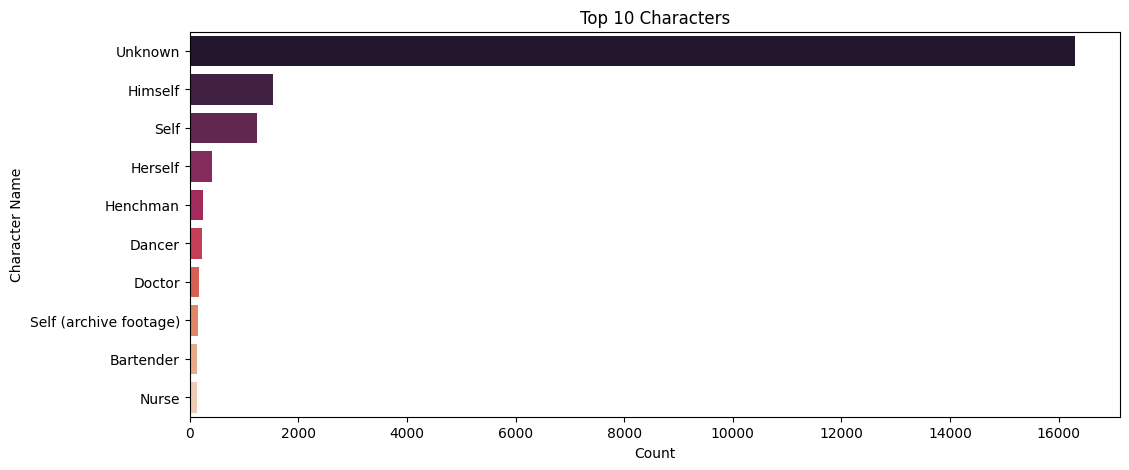

In [108]:
# 4.2 Character Analysis
def character_analysis(df):
    char_counts = df['character'].value_counts().head(10)
    print("\nTop 10 Characters:")
    print(char_counts)
    plt.figure(figsize=(12, 5))
    sns.barplot(x=char_counts.values, y=char_counts.index, palette='rocket')
    plt.title("Top 10 Characters")
    plt.xlabel("Count")
    plt.ylabel("Character Name")
    plt.show()

character_analysis(df)

# -------------------- 5. Text Analysis --------------------

* Generates a word cloud from descriptions.

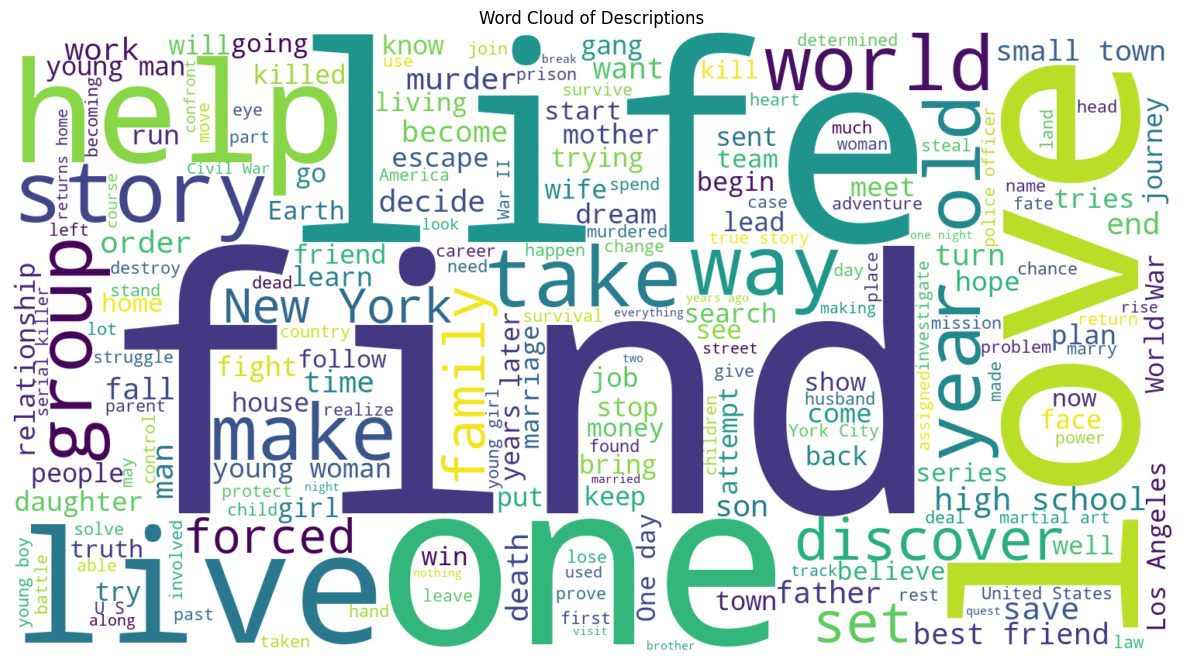

In [109]:
# 5.1 Word Cloud for Descriptions
def description_wordcloud(df):
    descriptions = ' '.join(df['description'].fillna(''))

    # Giving height & width
    display_width = 15
    display_height = 10

    wordcloud = WordCloud(width=int(display_width * 100), height=int(display_height * 80), background_color='white').generate(descriptions)
    plt.figure(figsize=(display_width, display_height))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Descriptions")
    plt.show()

description_wordcloud(df)

# -------------------- 6. Correlation Matrix --------------------

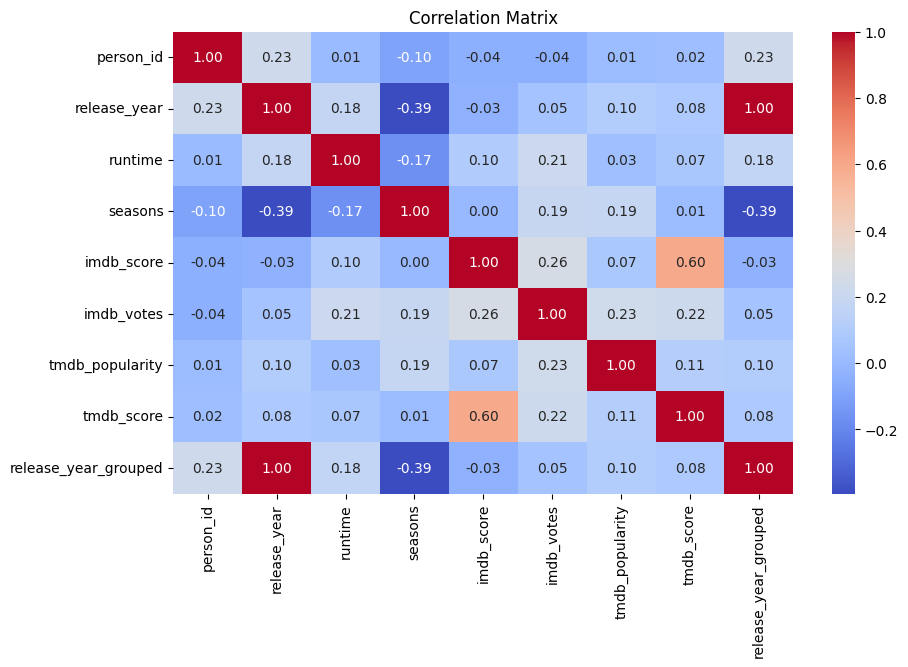

In [110]:
# 6.1 Correlation Matrix
def correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

correlation_matrix(df)

# -------------------- 7. Additional Insights --------------------

* Analyze genre co-occurrences and popularity by type.

In [111]:
# 7.1 Genre Co-occurrence Analysis
def genre_cooccurrence(df):
    from itertools import combinations
    genre_pairs = df['genres'].explode().dropna().apply(lambda x: tuple(sorted(x))).value_counts()
    genre_pairs_df = pd.DataFrame(genre_pairs, columns=['count'])
    genre_pairs_df = genre_pairs_df[genre_pairs_df['count']>10]
    print("\nGenre Co-occurrence:")
    print(genre_pairs_df.head(10))

genre_cooccurrence(df)


Genre Co-occurrence:
                                      count
genres                                     
(', ', [, a, a, d, m, r)              26956
( , ', ', ], a, a, d, m, r)           16703
( , ', ', a, a, d, m, r)              16265
(', ', [, e, h, i, l, l, r, r, t)     15177
( , ', ', a, c, i, n, o, t)           13558
(', ', [, c, d, e, m, o, y)           13335
( , ', ', ], a, c, e, m, n, o, r)     12255
( , ', ', c, d, e, m, o, y)           11912
( , ', ', ], c, d, e, m, o, y)        10466
( , ', ', ], a, e, e, n, o, p, r, u)  10198


<Figure size 1400x700 with 0 Axes>

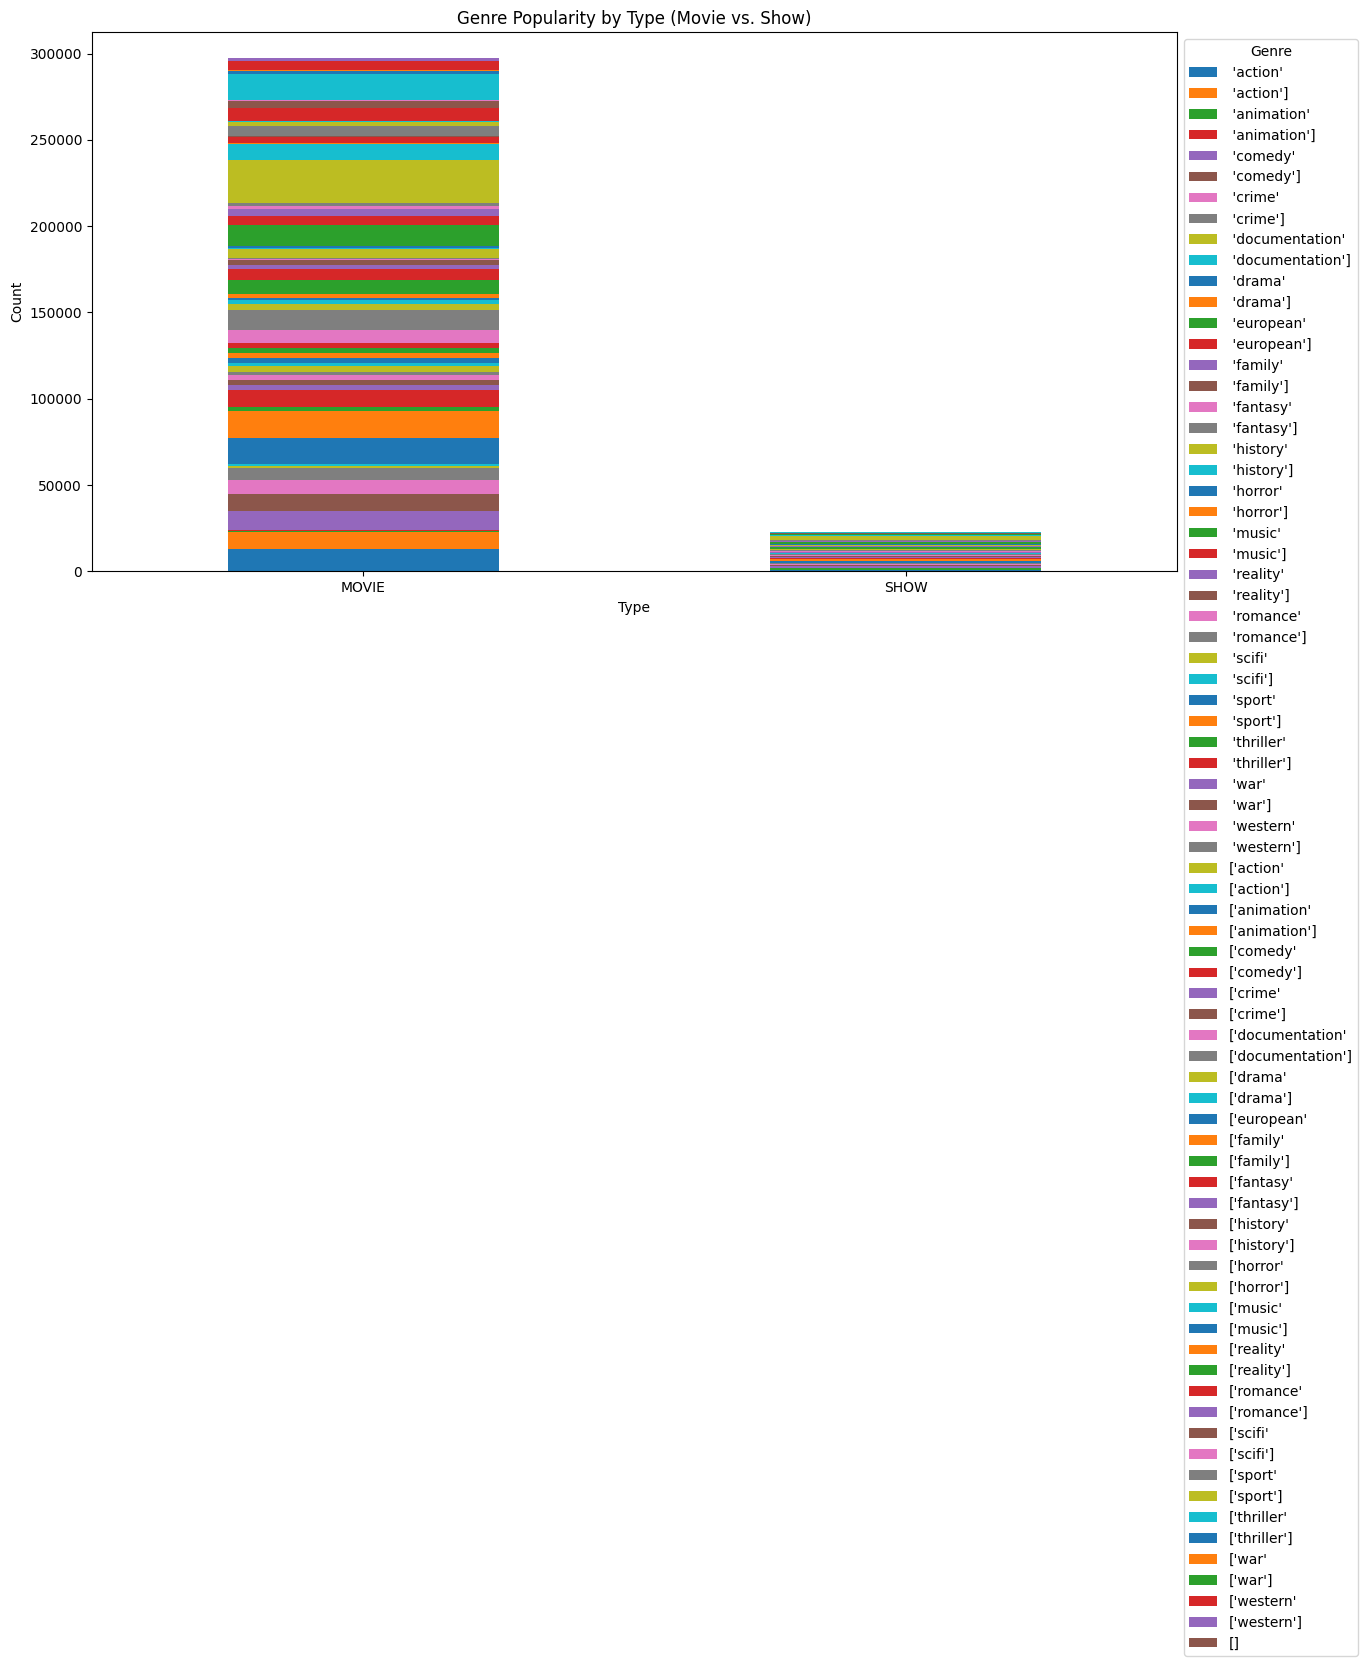

In [112]:
# 7.2 Genre Popularity by Type
def genre_popularity_by_type(df):
    df_exploded = df.explode('genres')
    genre_type_counts = df_exploded.groupby(['type', 'genres']).size().unstack(fill_value=0)
    plt.figure(figsize=(14, 7))
    genre_type_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title("Genre Popularity by Type (Movie vs. Show)")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.legend(title="Genre", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

genre_popularity_by_type(df)

* Explore country popularity over time.

<Figure size 1400x700 with 0 Axes>

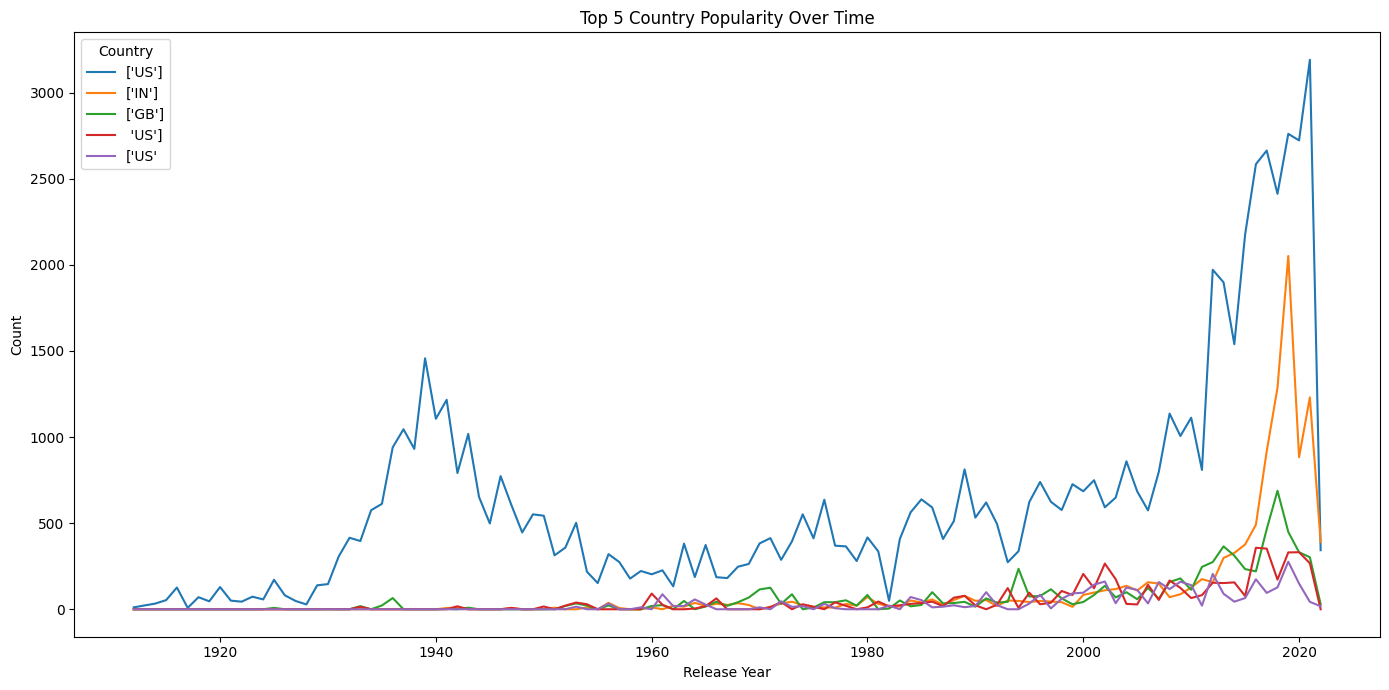

In [113]:
# 7.3 Country Popularity Over Time
def country_popularity_over_time(df):
    df_exploded = df.explode('production_countries')
    country_year_counts = df_exploded.groupby(['release_year', 'production_countries']).size().unstack(fill_value=0)
    top_countries = country_year_counts.sum().sort_values(ascending=False).head(5).index
    plt.figure(figsize=(14, 7))
    country_year_counts[top_countries].plot(kind='line', figsize=(14, 7))
    plt.title("Top 5 Country Popularity Over Time")
    plt.xlabel("Release Year")
    plt.ylabel("Count")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

country_popularity_over_time(df)

*  Examine score distributions by genre and age certification.

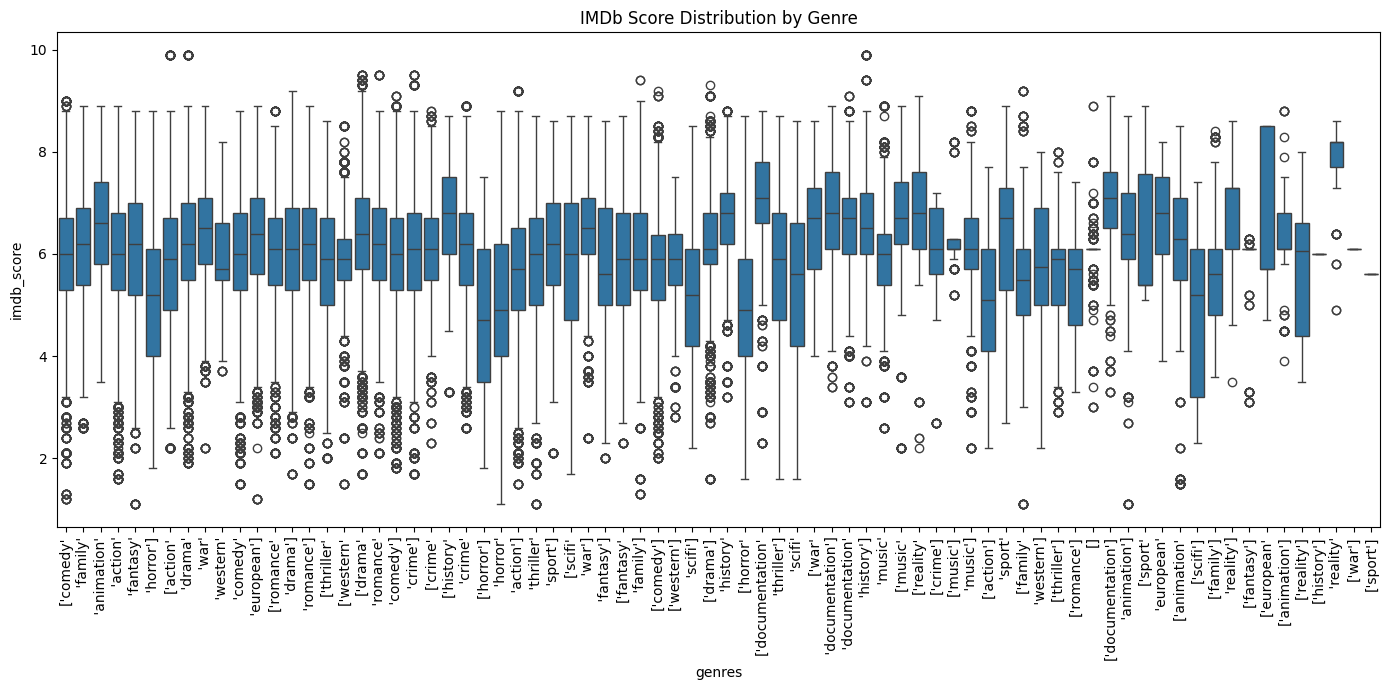

In [114]:
# 7.4 Score Distribution by Genre
def score_distribution_by_genre(df):
    df_exploded = df.explode('genres')
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='genres', y='imdb_score', data=df_exploded)
    plt.title("IMDb Score Distribution by Genre")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

score_distribution_by_genre(df)

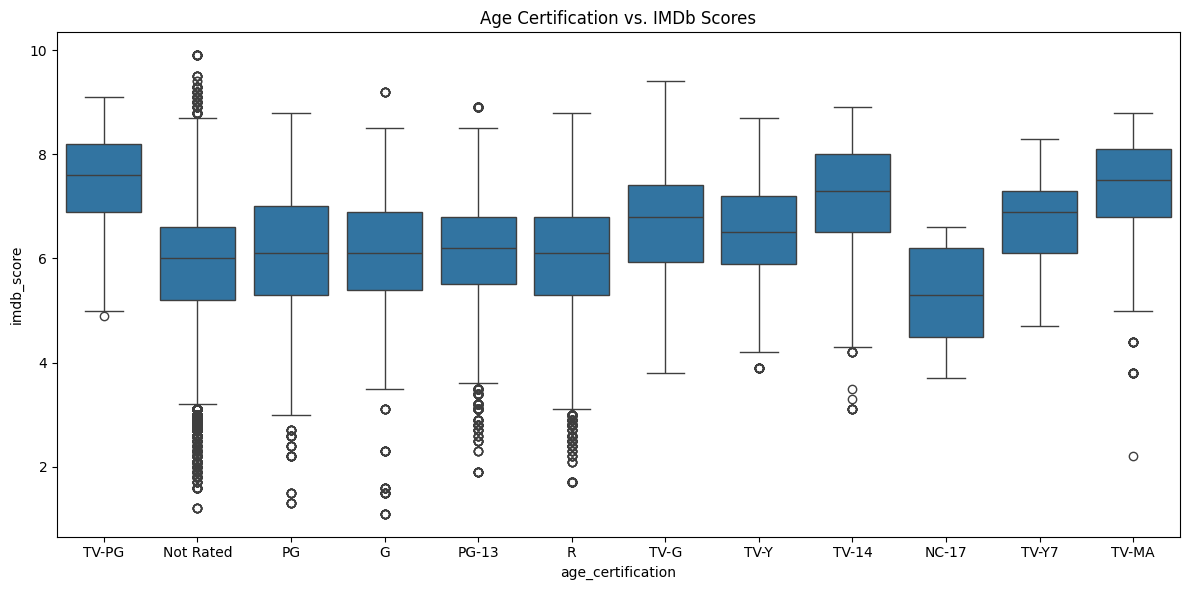

In [115]:
# 7.5 Age Certification vs. Scores
def age_certification_vs_scores(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='age_certification', y='imdb_score', data=df)
    plt.title("Age Certification vs. IMDb Scores")
    plt.tight_layout()
    plt.show()

age_certification_vs_scores(df)


*  Analyze actor/director genre preferences.

In [116]:
# 7.6 Actor/Director Genre Preferences
def actor_director_genre_preferences(df):
    actor_genres = df[df['role'] == 'ACTOR'].explode('genres').groupby('name')['genres'].value_counts().nlargest(10)
    director_genres = df[df['role'] == 'DIRECTOR'].explode('genres').groupby('name')['genres'].value_counts().nlargest(10)
    print("\nTop Actor Genre Preferences:")
    print(actor_genres)
    print("\nTop Director Genre Preferences:")
    print(director_genres)

actor_director_genre_preferences(df)


Top Actor Genre Preferences:
name                  genres    
Roy Rogers            ['western'    37
George 'Gabby' Hayes  ['western'    34
Yakima Canutt         ['western'    27
Charles King          ['western'    26
Gene Autry            ['western'    25
Herman Hack           ['western'    25
Roy Rogers             'music'      25
Fred Burns            ['western'    24
Trigger               ['western'    24
Jack Rockwell         ['western'    22
Name: count, dtype: int64

Top Director Genre Preferences:
name              genres    
Joseph Kane       ['western'    35
Jay Chapman       ['comedy']    24
Joseph Kane        'action'     23
                   'music'      22
Sam Newfield      ['western'    21
Lesley Selander   ['western'    15
Brian Volk-Weiss  ['comedy']    14
Harry L. Fraser   ['western'    14
Joseph Kane        'action']    13
Manny Rodriguez   ['comedy']    13
Name: count, dtype: int64


##  -------------------- 8. Conclusion --------------------

* This exploratory data analysis of the movie and TV show dataset has provided a comprehensive overview of the data's characteristics and revealed several key insights.

## Key Findings:
- The dataset shows a clear trend of increasing content production over the years, with a notable surge in recent decades.
- 'Drama' and 'Comedy' are among the most prevalent genres, indicating their sustained popularity.
- The United States and India are major production hubs, reflecting their significant contributions to the global entertainment industry.
- IMDb and TMDB scores exhibit a positive correlation, suggesting a general consensus in audience ratings.
- Analysis of personnel data highlighted the most prolific actors and directors, as well as common character archetypes.
- Word cloud visualization of descriptions revealed frequently used terms, providing a glimpse into the thematic content of the titles.

## Key Observations:
- The distribution of release years indicates a rapid expansion of content creation, likely driven by the rise of streaming platforms.
- The diverse range of age certifications suggests a wide variety of content catering to different audiences.
- The analysis of genre co-occurrence and country popularity over time revealed interesting patterns in content production and consumption.

## Limitations:
- Missing values in some columns were imputed, which might introduce some level of bias into the analysis.
- The analysis is based on the available data and does not account for external factors that may influence content trends.

## Potential Next Steps:
- Conduct sentiment analysis on movie and show descriptions to gauge audience sentiment.
- Develop a predictive model to forecast IMDb or TMDB scores based on various features.
- Perform a more detailed network analysis of actor and director collaborations to uncover deeper relationships.
- Investigate the impact of release year and country of production on content ratings.